In [218]:
import os

import warnings

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [219]:
# hide warnings
warnings.filterwarnings("ignore")

In [220]:
def concat_files(files):
    data = []
    for f in files:
        with open(f, 'r') as fd:
            data += fd.readlines()
    data = [d.strip().split() for d in data]
    return data

In [232]:
def plot_summary(exp_path, run_ids, metric, save_path=None):
    if isinstance(run_ids, str):
        run_ids = [run_ids]
    if isinstance(metric, str):
        metric = [metric]

    if len(metric) > 1:
        common_metric = ' '.join(metric[0].split('_')[1:]).capitalize()
    else:
        common_metric = metric[0].replace('_', ' ').capitalize()


    plt.figure(figsize=(10, 5))
    sns.set_theme(style='whitegrid')
    for m in metric:
        file_list = [os.path.join(exp_path, run_path, 'metrics', m) for run_path in run_ids]
        data = concat_files(file_list)

        df = pd.DataFrame(data, columns=['time', 'value', 'step'])
        df['value'] = df['value'].astype(float)
        df['time'] = pd.to_datetime(df['time'],unit='ms')
        df = df.sort_values(by='time')
        df['step'] = np.arange(len(df))

        m = m.replace('_', ' ').capitalize()

        time_range = df['time'].max() - df['time'].min()
        time_str = f'{time_range.days} days, {(time_range.seconds%(24*3600))//3600} hours, {(time_range.seconds%3600)//60} minutes'
        if time_range.days == 0:
            time_str = time_str.replace('0 days, ', '')

        sns.lineplot(x='step', y='value', data=df, dashes=False, label=m)
        if len(df) < 100:
            sns.scatterplot(x='step', y='value', data=df)
    
    plt.xlabel('Epsisode(s)')
    plt.ylabel(common_metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.title(f'{common_metric} over time ({time_str})')

    if save_path is not None:
        plt.savefig(save_path)

    plt.show()

# Genetic algorithnm

## Versus random

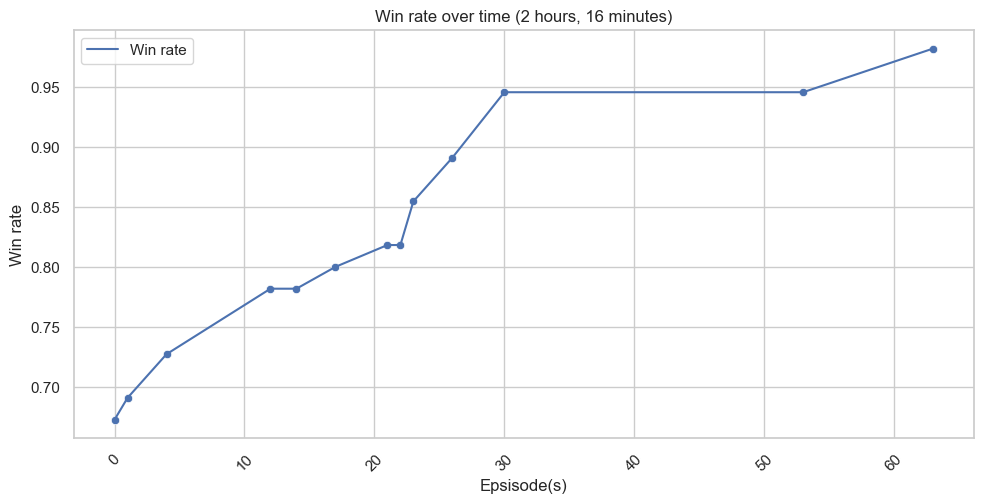

In [213]:
plot_summary(exp_path='..\\src\\ga_on_dql\\mlruns\\739024248417585975',
             run_ids='8e375c367c83414eacd55d3b330d558c',
             metric='win_rate',
             save_path='./ga/random_win_rate.png')

## Versus minimax depth 1

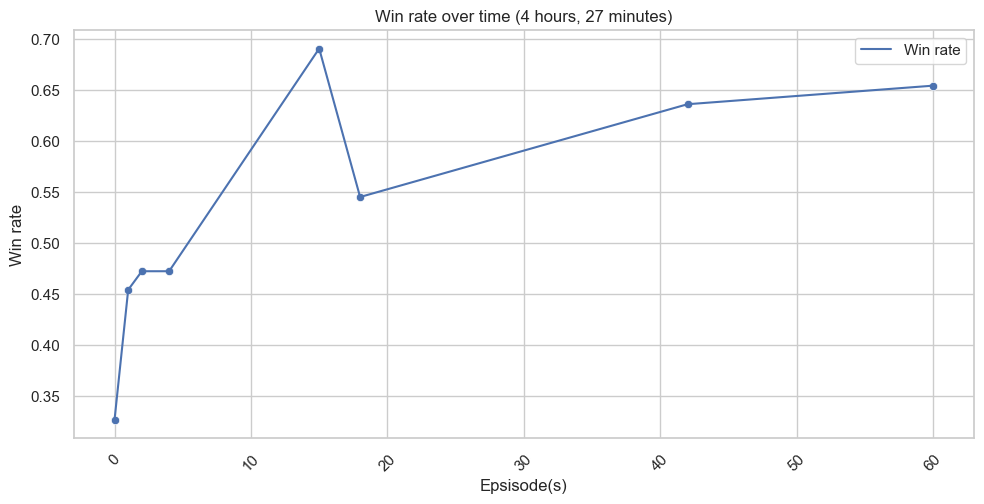

In [214]:
plot_summary(exp_path='..\\src\\ga_on_dql\\mlruns\\739024248417585975',
             run_ids='c915ff35d46242268d146f51b9795111',
             metric='win_rate',
             save_path='./ga/minimax_d1_win_rate.png')

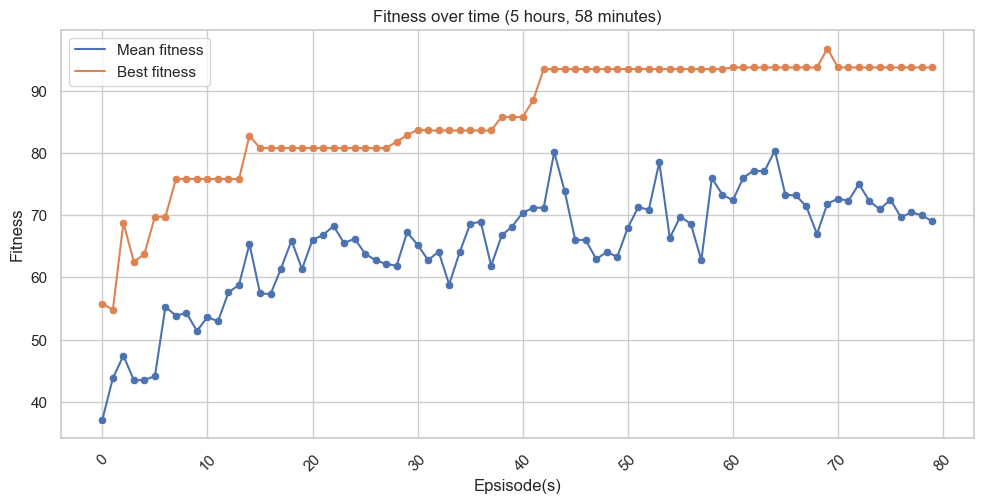

In [215]:
plot_summary(exp_path='..\\src\\ga_on_dql\\mlruns\\739024248417585975',
             run_ids='c915ff35d46242268d146f51b9795111',
             metric=['mean_fitness', 'best_fitness'],
             save_path='./ga/minimax_d1_fitness.png')

## Versus minimax depth 2

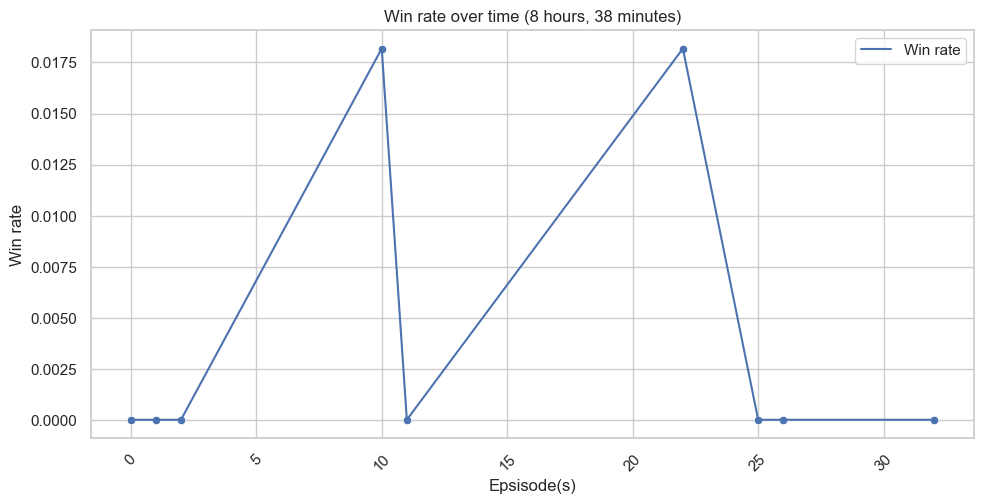

In [216]:
plot_summary(exp_path='..\\src\\ga_on_dql\\mlruns\\739024248417585975',
             run_ids='4d89cd02ef2a420a920d85e52defad5a',
             metric='win_rate',
             save_path='./ga/minimax_d2_win_rate.png')

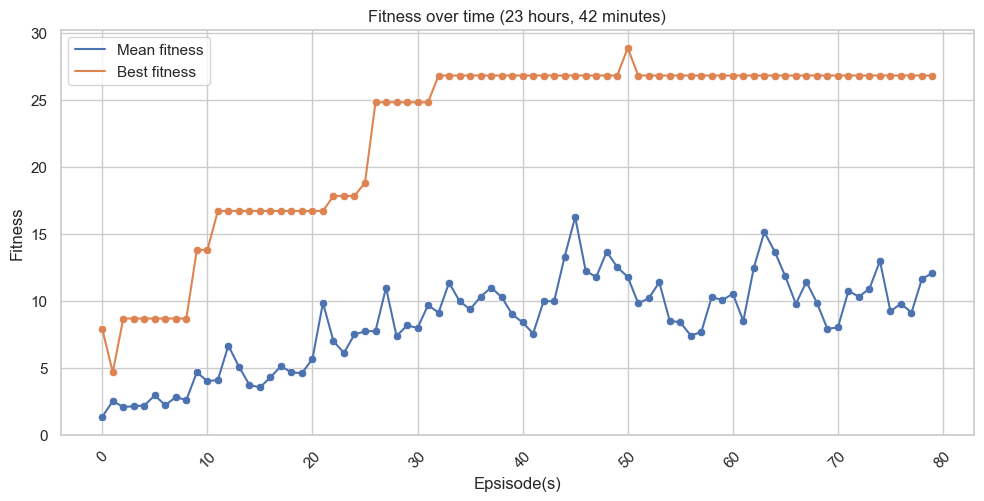

In [217]:
plot_summary(exp_path='..\\src\\ga_on_dql\\mlruns\\739024248417585975',
             run_ids='4d89cd02ef2a420a920d85e52defad5a',
             metric=['mean_fitness', 'best_fitness'],
             save_path='./ga/minimax_d2_fitness.png')

# Deep Q Learning

## Small model

### Versus random

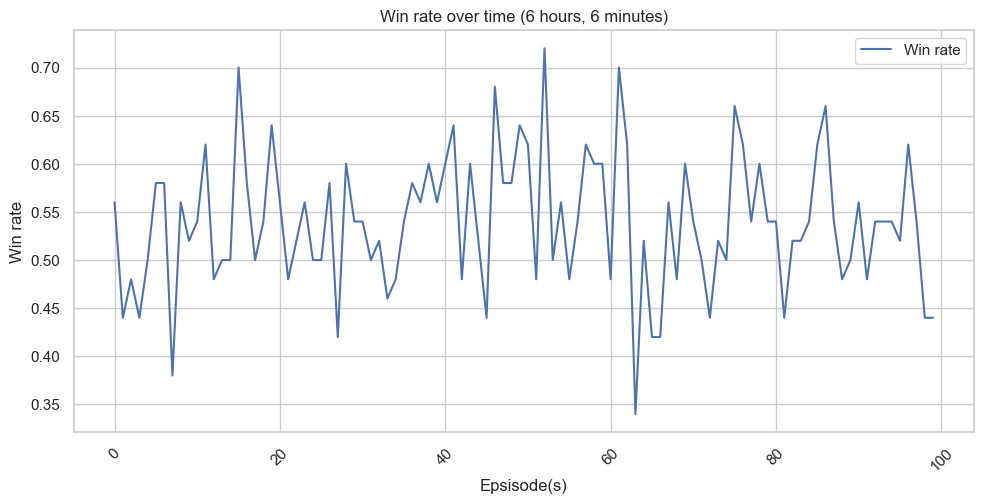

In [224]:
plot_summary(exp_path='..\\src\\dql_with_gradient\\mlruns\\326131859565340182',
             run_ids='32d1cdb02e7043bba3ffd9bef17f202d',
             metric='win rate',
             save_path='./dql/small_random_win_rate.png')

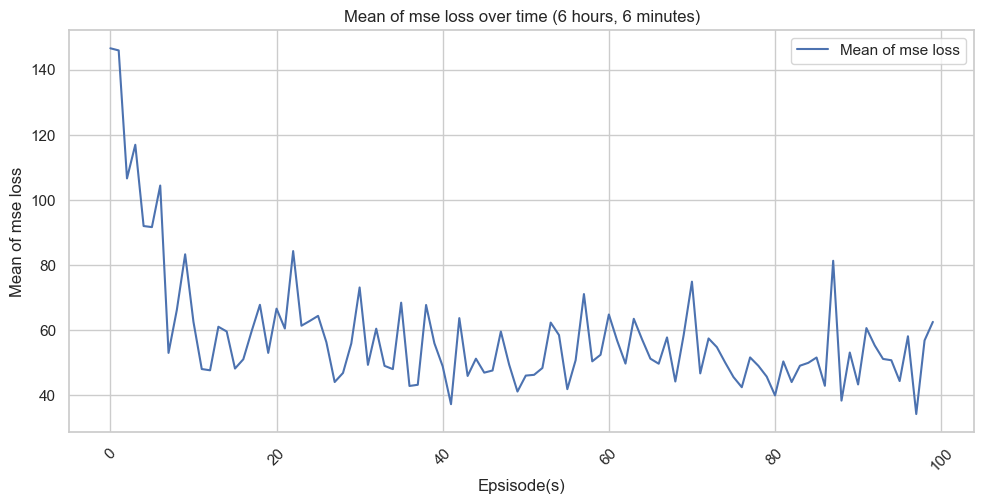

In [225]:
plot_summary(exp_path='..\\src\\dql_with_gradient\\mlruns\\326131859565340182',
             run_ids='32d1cdb02e7043bba3ffd9bef17f202d',
             metric='mean of mse loss',
             save_path='./dql/small_random_mean_of_mse_loss.png')

### Versus minimax depth 2

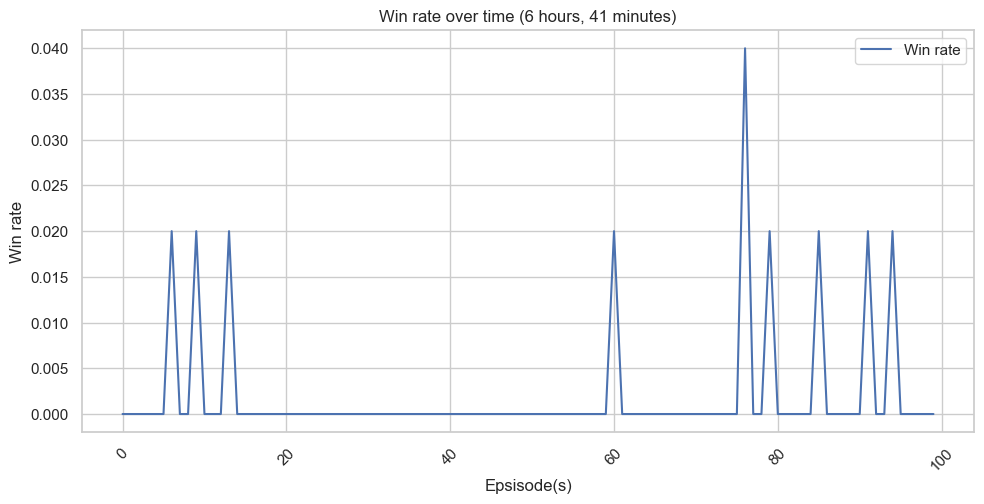

In [226]:
plot_summary(exp_path='..\\src\\dql_with_gradient\\mlruns\\326131859565340182',
             run_ids='fb7182c7751a43518d8798d205bceaf0',
             metric='win rate',
             save_path='./dql/small_minimax_d2_win_rate.png')

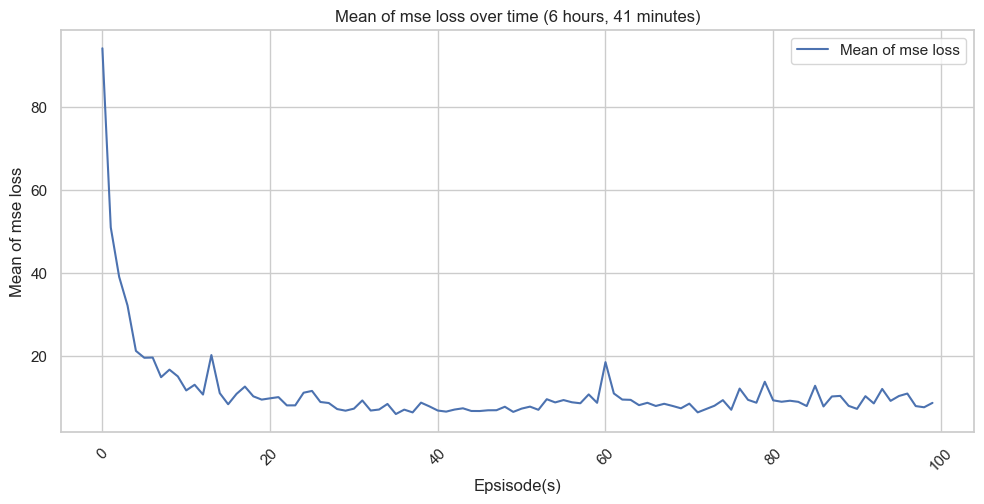

In [227]:
plot_summary(exp_path='..\\src\\dql_with_gradient\\mlruns\\326131859565340182',
             run_ids='fb7182c7751a43518d8798d205bceaf0',
             metric='mean of mse loss',
             save_path='./dql/small_minimax_d2_mean_of_mse_loss.png')

## Medium model (with Convolution)

### Versus minimax depth 2

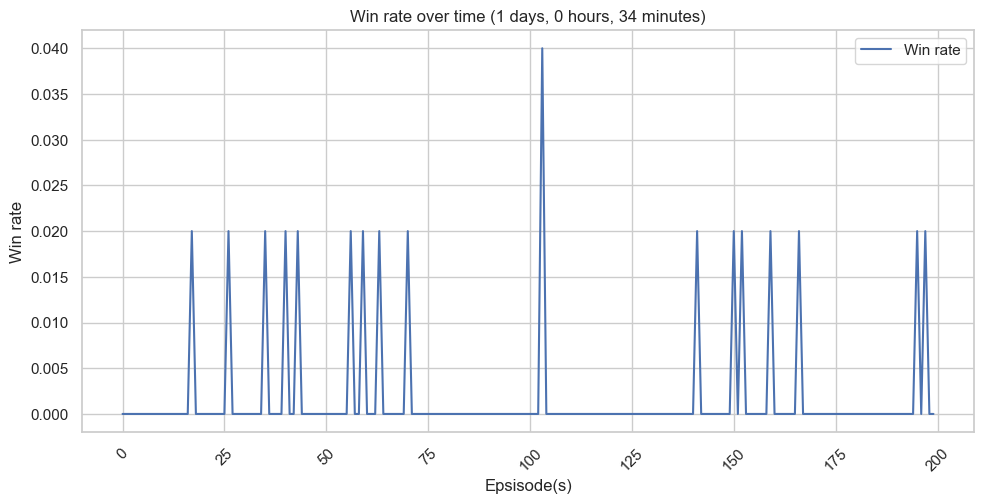

In [234]:
plot_summary(exp_path='..\\src\\dql_with_gradient\\mlruns\\313228189958885638',
             run_ids=['f567f46dc6ef49999c6e9947a6834651', '47dc36b0fe70431e8382f1351e8f9883'],
             metric='win rate',
             save_path='./dql/medium_minimax_d2_win_rate.png')

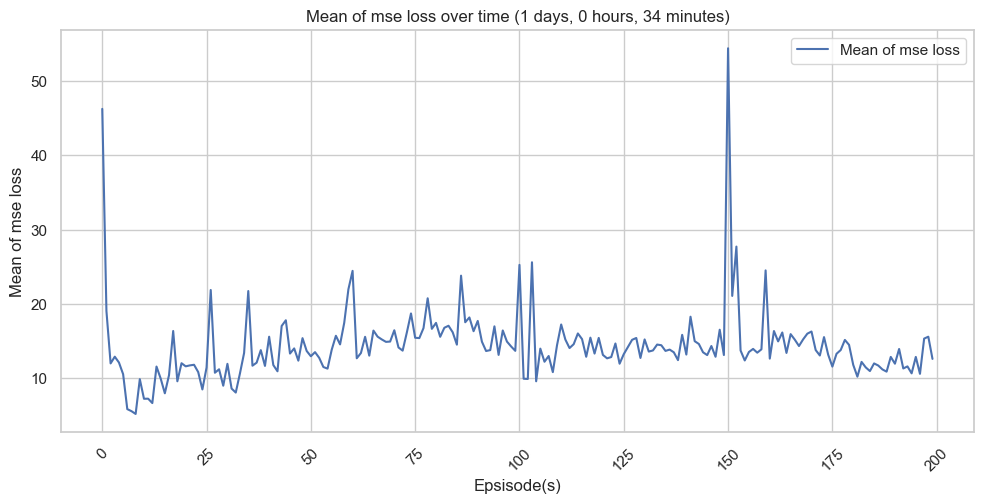

In [235]:
plot_summary(exp_path='..\\src\\dql_with_gradient\\mlruns\\313228189958885638',
             run_ids=['f567f46dc6ef49999c6e9947a6834651', '47dc36b0fe70431e8382f1351e8f9883'],
             metric='mean of mse loss',
             save_path='./dql/medium_minimax_d2_mean_of_mse_loss.png')

## Medium model (without Convolution)

### Versus minimax depth 2

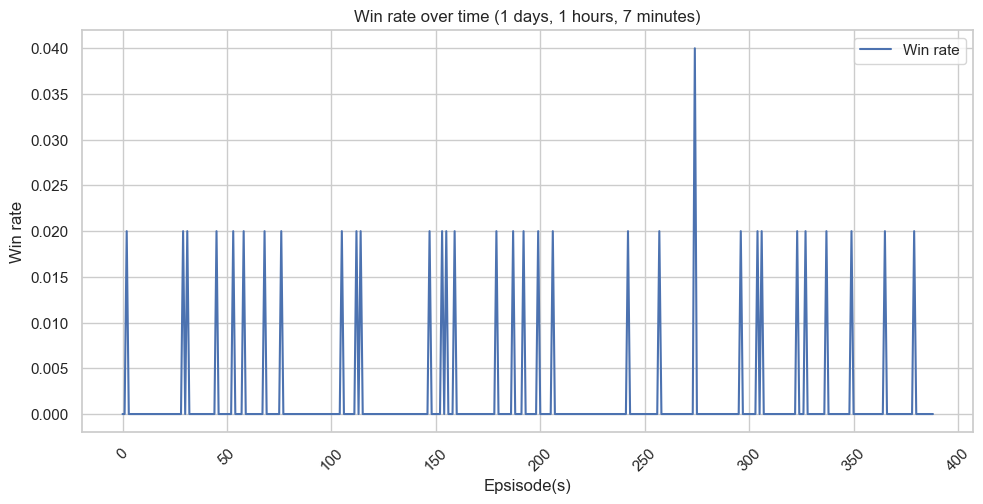

In [236]:
plot_summary(exp_path='..\\src\\dql_with_gradient\\mlruns\\637566326274228421',
             run_ids=['6f4f77c824f6405badcf198bd6b71626', '3b27daa4ba5b4454868bce9cd2b469d1', '7620662aa0c54bf3b7ba8a150fde4706', '5ea89afca199413a872fd79f45f29795'],
             metric='win rate',
             save_path='./dql/mediumncnn_minimax_d2_win_rate.png')

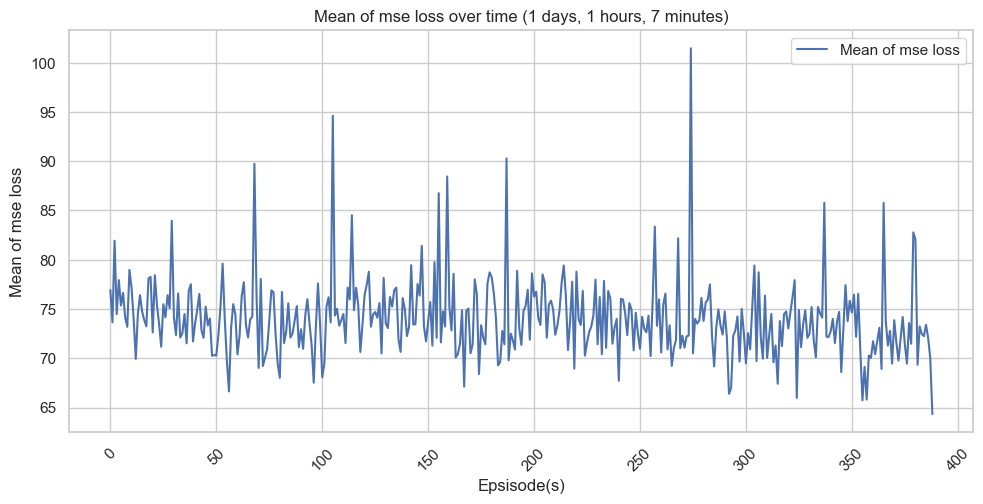

In [237]:
plot_summary(exp_path='..\\src\\dql_with_gradient\\mlruns\\637566326274228421',
             run_ids=['6f4f77c824f6405badcf198bd6b71626', '3b27daa4ba5b4454868bce9cd2b469d1', '7620662aa0c54bf3b7ba8a150fde4706', '5ea89afca199413a872fd79f45f29795'],
             metric='mean of mse loss',
             save_path='./dql/mediumncnn_minimax_d2_mean_of_mse_loss.png')